In [130]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [131]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
df = pd.read_csv("./Knight ML Assignment/Data/train.csv")

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Wine production according to Province
We find out that California produces the largest amount of Wine (almost one third of the total production).

Saving figure Wine production according to Province_1


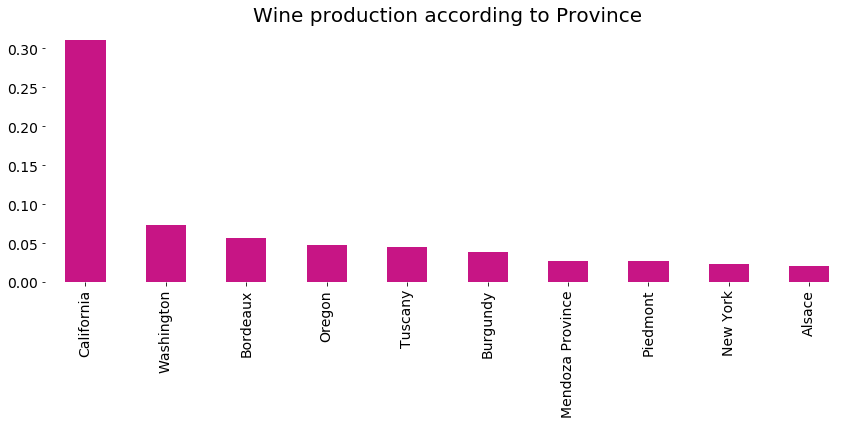

In [132]:
ax = (df['province'].value_counts().head(10) / len(df)).plot.bar(figsize=(12, 6), fontsize=14, color='mediumvioletred')
ax.set_title("Wine production according to Province", fontsize=20)
sns.despine(bottom=True, left=True)
save_fig('Wine production according to Province_1')
plt.show()

Saving figure Wine production according to Province_2


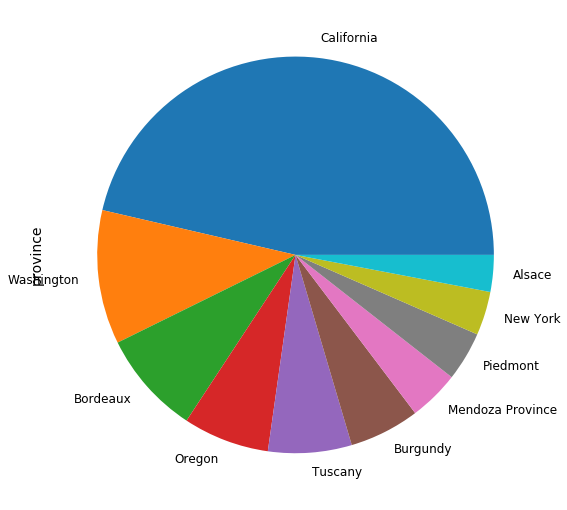

In [133]:
df['province'].value_counts().head(10).plot.pie(figsize=(8, 8))
plt.gca().set_aspect('equal')
save_fig("Wine production according to Province_2")

## Wine production according to Country
Apparently, US is the biggest Wine producing Country.

Saving figure Wine production according to Country_1


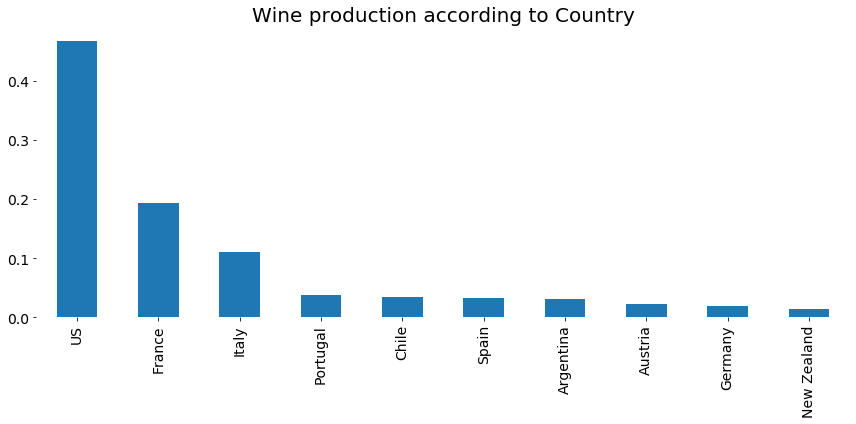

In [134]:
ax = (df['country'].value_counts().head(10) / len(df)).plot.bar(figsize=(12, 6), fontsize=14)
ax.set_title("Wine production according to Country", fontsize=20)
sns.despine(bottom=True, left=True)
save_fig('Wine production according to Country_1')
plt.show()

Saving figure Wine production according to Province_2


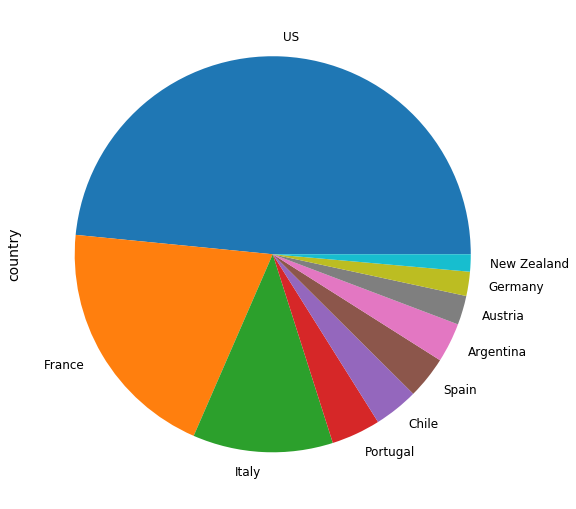

In [135]:
df['country'].value_counts().head(10).plot.pie(figsize=(8, 8))
plt.gca().set_aspect('equal')
save_fig('Wine production according to Province_2')

## Price and Points comparisons

Most of the points are between 85 to 92 range. So, a rating of 92 should be considered as a good rating. Anything above 92 should be considered exceptional.

Saving figure Price and Points comparisons_1


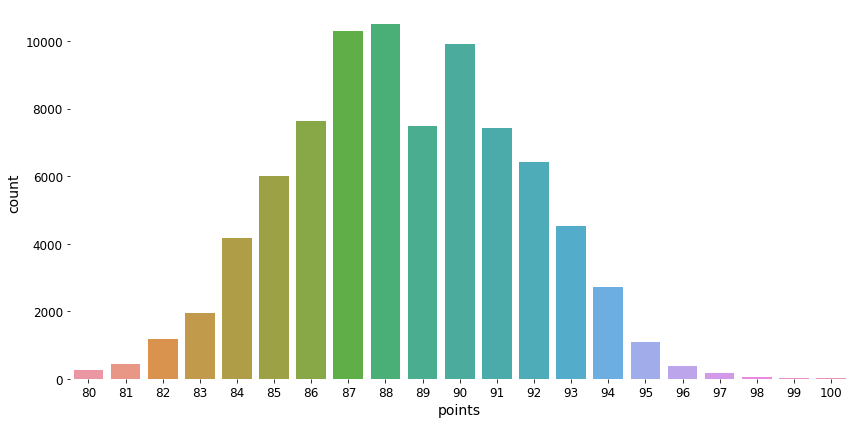

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(df['points'])
sns.despine(bottom=True, left=True)
save_fig('Price and Points comparisons_1')
plt.show()

As expected, the points(ratings) increase as the price increases.

Saving figure Price and Points comparisons_2


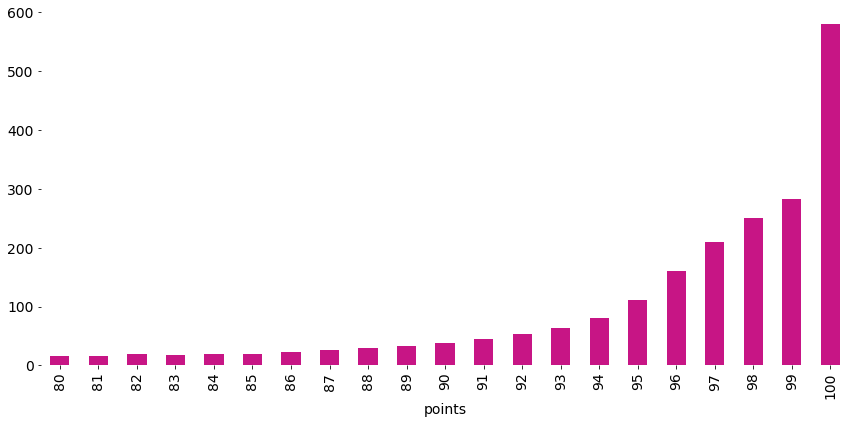

In [137]:
df.groupby('points').price.mean().plot.bar(figsize=(12, 6), fontsize=14, color='mediumvioletred')
sns.despine(bottom=True, left=True)
save_fig('Price and Points comparisons_2')
plt.show()

From the following plots, it is evident that more expensive Wines have more points. Also, the density is more between the price of 10 to 40, this shows that more people buy Wine between the price of 10 to 40.

Saving figure Price and Points comparisons_3


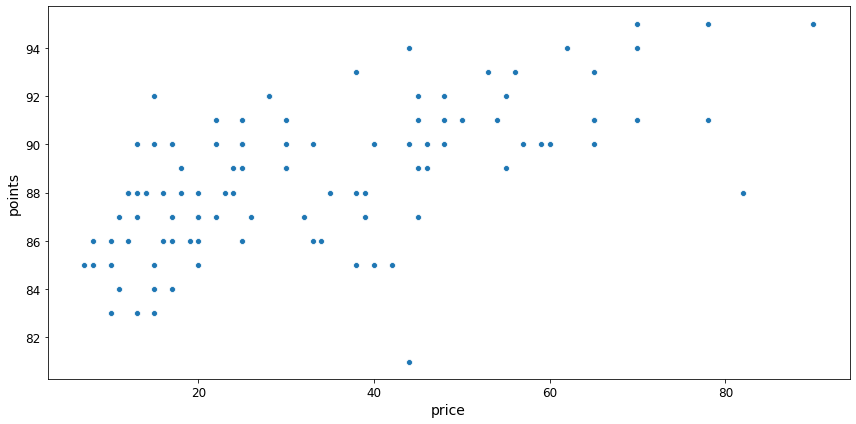

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='points', data=df[df['price'] < 100].sample(100))
save_fig('Price and Points comparisons_3')
plt.show()

Saving figure Price and Points comparisons_4


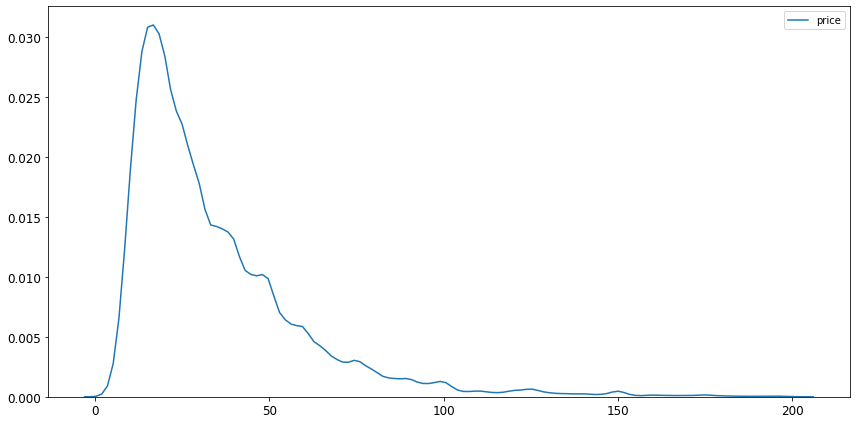

In [139]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df.query('price < 200').price)
save_fig('Price and Points comparisons_4')
plt.show()

Saving figure Price and Points comparisons_5


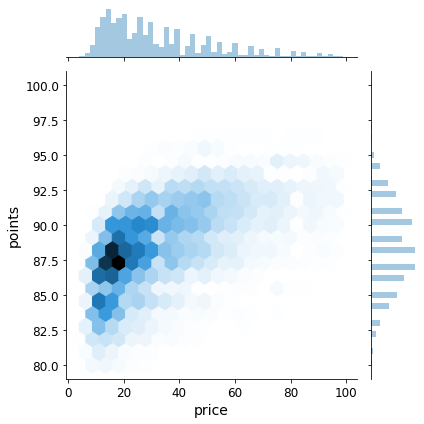

In [140]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 100], kind='hex', gridsize=20)
save_fig('Price and Points comparisons_5')
plt.show()

## Variety and Points Comparison 

Pinot Noir and Bordeaux-style Red Blend got the highest points while Rosé and Merlot got low points.

Saving figure Variety and Points Comparison_1


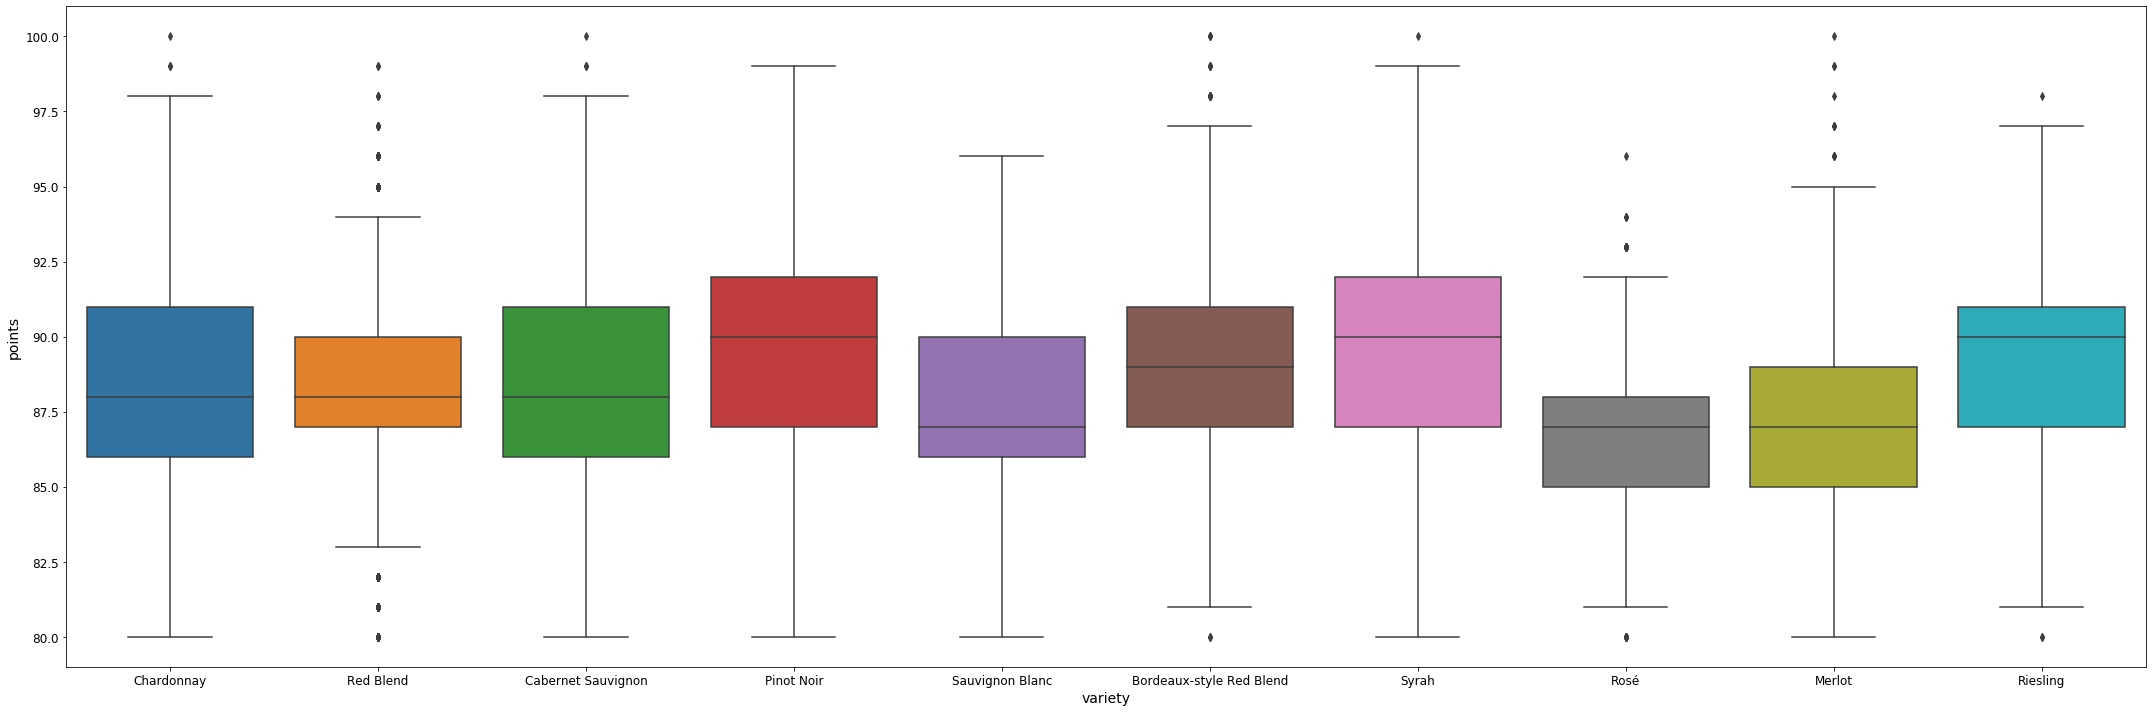

In [141]:
df1 = df[df.variety.isin(df.variety.value_counts().head(10).index)]
plt.figure(figsize=(30,10))
sns.boxplot(
    x='variety',
    y='points',
    data=df1
)
save_fig('Variety and Points Comparison_1')
plt.show()

Saving figure Variety and Points Comparison_2


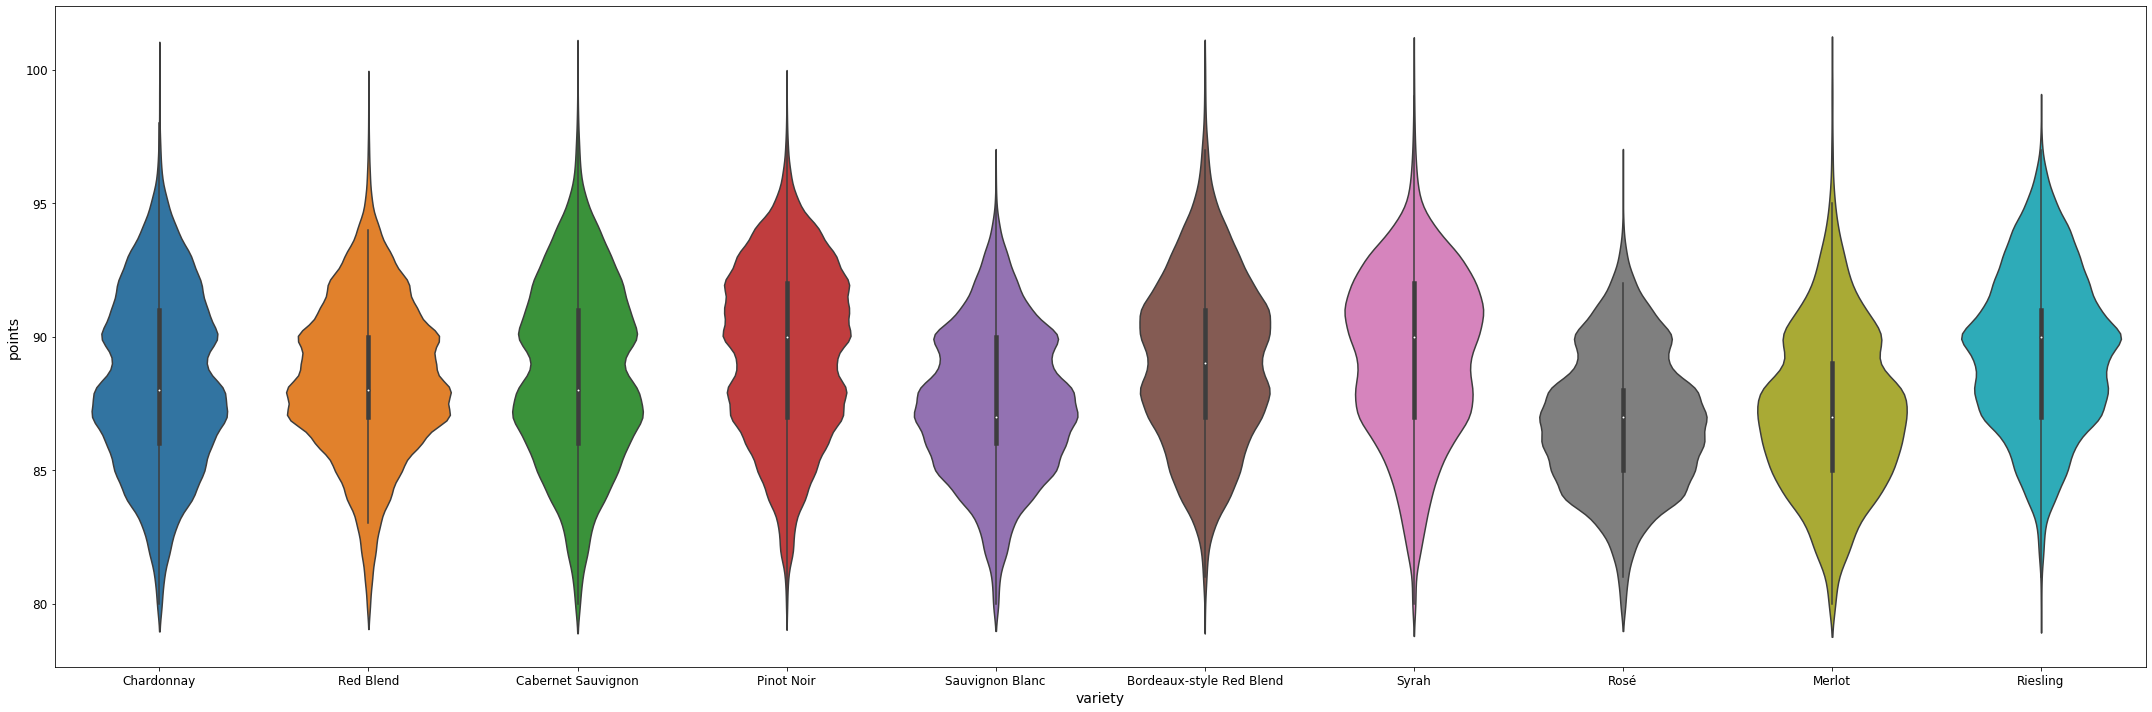

In [142]:
plt.figure(figsize=(30,10))
sns.violinplot(
    x='variety',
    y='points',
    data=df1
)
save_fig('Variety and Points Comparison_2')
plt.show()

## Winery and Points comparison

It is clear that Williams Selyem got the most points, so from the ratings point of view, it is the best Winery. Louis Lator and Testarossa also got good points.

Saving figure Winery and Points comparison_1


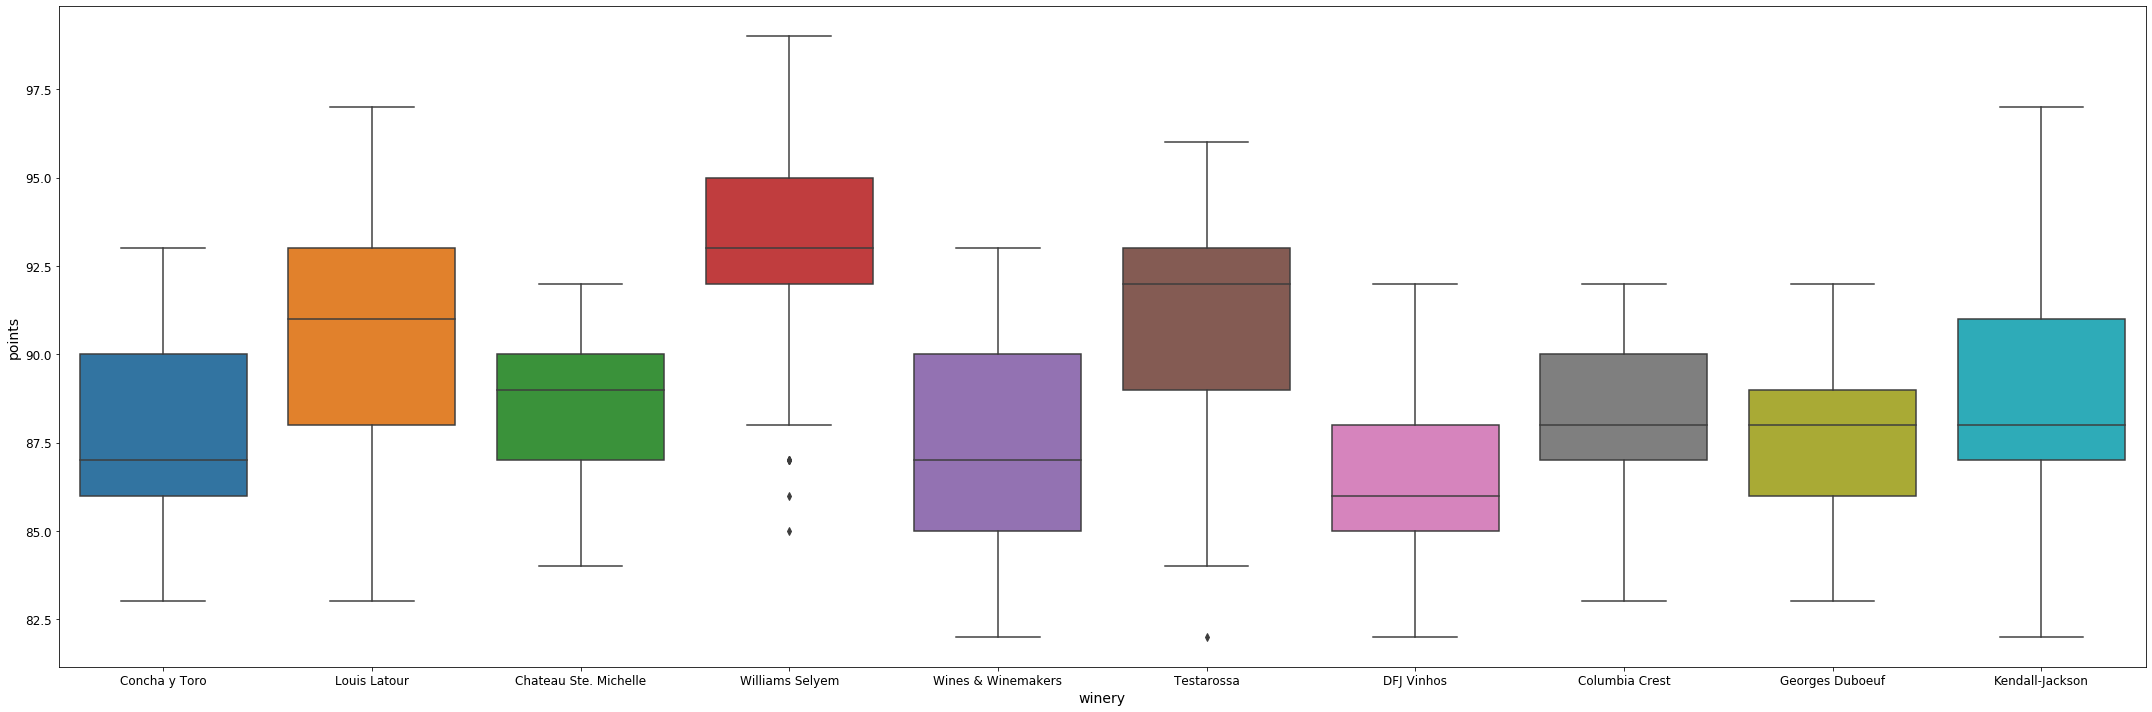

In [143]:
df1 = df[df.winery.isin(df.winery.value_counts().head(10).index)]
plt.figure(figsize=(30,10))
sns.boxplot(
    x='winery',
    y='points',
    data=df1
)
save_fig('Winery and Points comparison_1')
plt.show()

## Winery and Price Comparison

It is clear that Louis Lator makes the most expensive wines.

Saving figure Winery and Points comparison_2


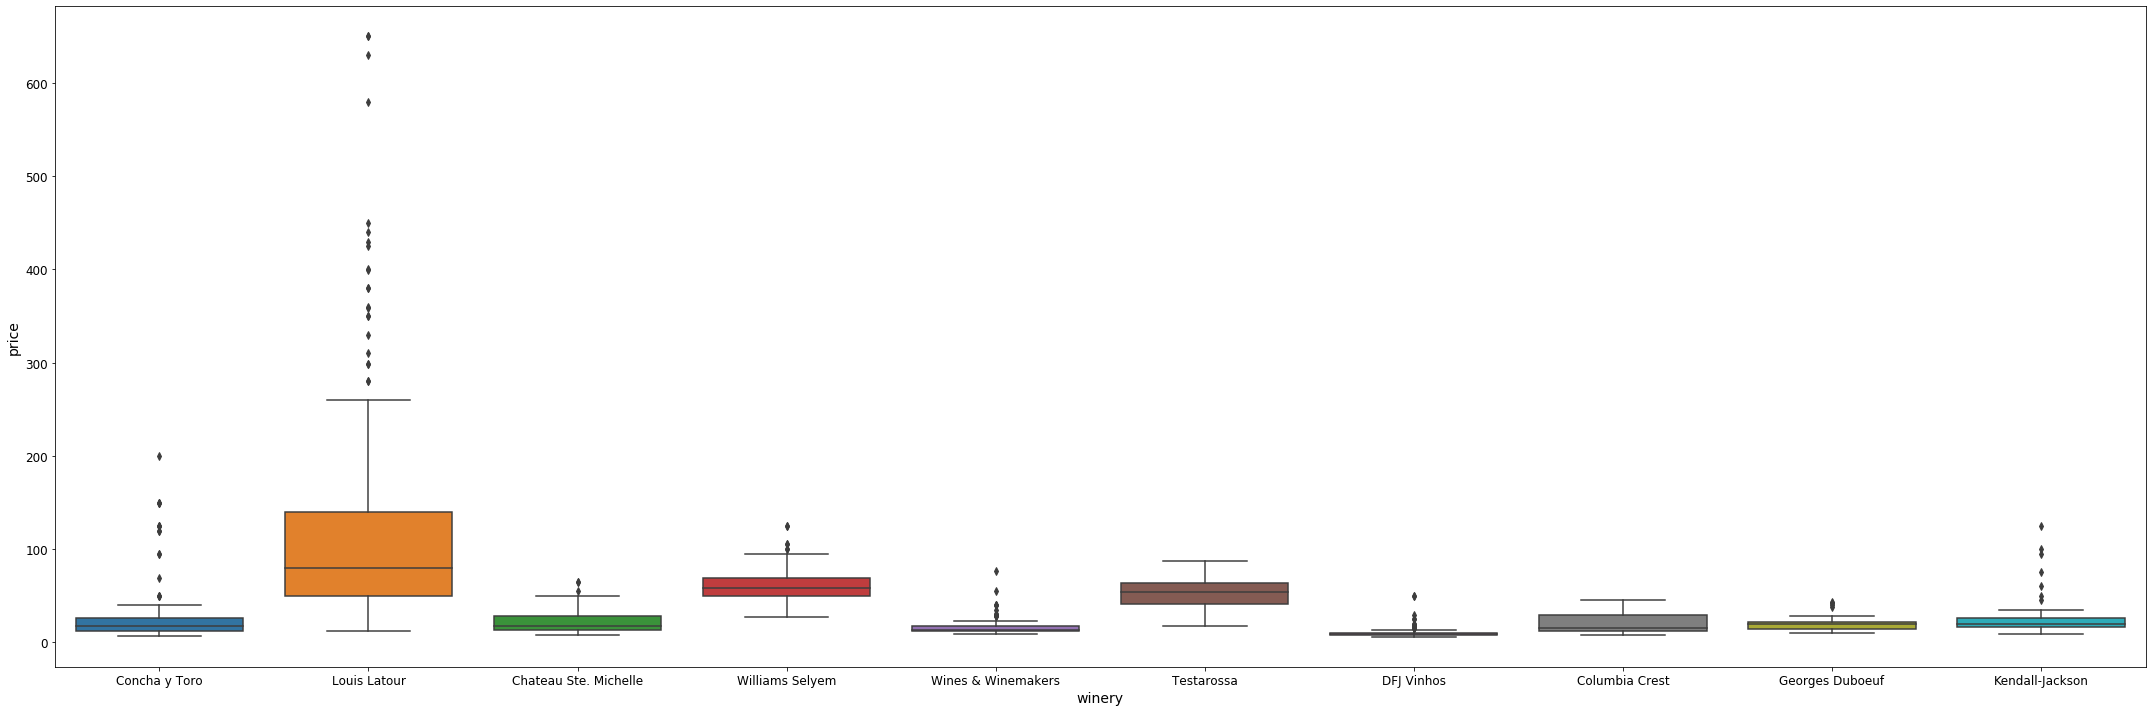

In [144]:
df1 = df[df.winery.isin(df.winery.value_counts().head(10).index)]
plt.figure(figsize=(30,10))
sns.boxplot(
    x='winery',
    y='price',
    data=df1
)
save_fig('Winery and Points comparison_2')
plt.show()

## Relation between Length of review and points

In [127]:
review_len = []
for i in range(df.review_description.shape[0]):         
    review_len.append(len(df['review_description'][i].split()))
df['review_len'] = review_len

Generally, more the points(ratings), more is the length of review. 

Saving figure Relation between Length of review and points


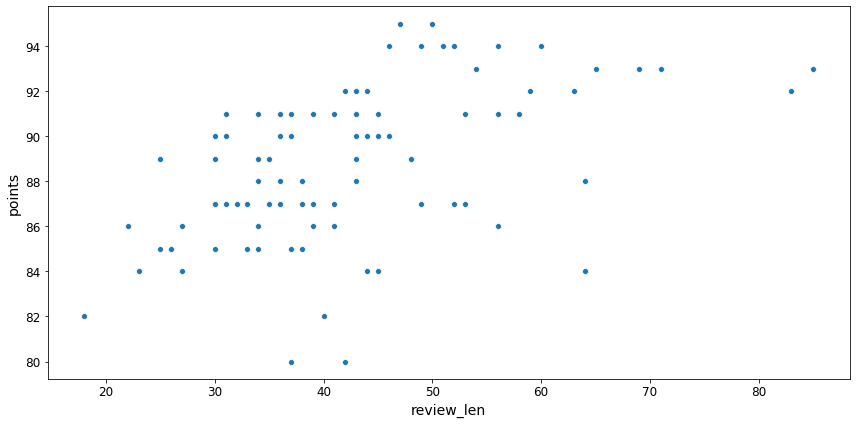

In [145]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_len', y='points', data=df[df['price'] < 100].sample(100))
save_fig('Relation between Length of review and points')
plt.show()